# Checking out some instances to check if everything works fine

In [1]:
# import the stuff
from cetsp_bnb2 import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution, compute_tour_from_sequence

In [2]:
# Load instances
import aemeasure
db_ = aemeasure.Database("instance_db")
data = db_.load()
instances = {instance["instance"]: instance  for instance in data}

In [3]:
list(instances.keys())

['bedhani/CETSP-18-12',
 'bedhani/CETSP-18-15',
 'bedhani/CETSP-18-23',
 'bedhani/CETSP-18-24',
 'bedhani/CETSP-10-10',
 'bedhani/CETSP-20-27',
 'bedhani/CETSP-14-20',
 'bedhani/CETSP-20-18',
 'bedhani/CETSP-14-27',
 'bedhani/CETSP-20-20',
 'bedhani/CETSP-10-17',
 'bedhani/CETSP-14-18',
 'bedhani/CETSP-10-28',
 'bedhani/CETSP-14-11',
 'bedhani/CETSP-20-03',
 'bedhani/CETSP-20-16',
 'bedhani/CETSP-10-21',
 'bedhani/CETSP-20-29',
 'bedhani/CETSP-10-26',
 'bedhani/CETSP-20-04',
 'bedhani/CETSP-20-11',
 'bedhani/CETSP-14-16',
 'bedhani/CETSP-10-19',
 'bedhani/CETSP-14-29',
 'bedhani/CETSP-18-25',
 'bedhani/CETSP-18-22',
 'bedhani/CETSP-18-14',
 'bedhani/CETSP-18-13',
 'bedhani/CETSP-30-10',
 'bedhani/CETSP-14-17',
 'bedhani/CETSP-20-10',
 'bedhani/CETSP-20-05',
 'bedhani/CETSP-10-27',
 'bedhani/CETSP-14-28',
 'bedhani/CETSP-10-18',
 'bedhani/CETSP-10-20',
 'bedhani/CETSP-20-17',
 'bedhani/CETSP-20-02',
 'bedhani/CETSP-14-10',
 'bedhani/CETSP-20-28',
 'bedhani/CETSP-10-16',
 'bedhani/CETSP-

In [4]:
radius = 0.25
instance_name = "bedhani/CETSP-08-18"
instance = Instance([Circle(Point(float(d["x"]), float(d["y"])), radius) for d in instances[instance_name]["circles"]])

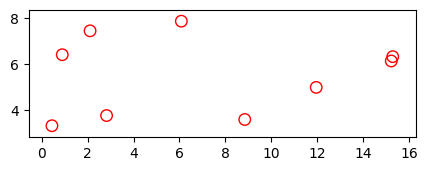

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [6]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


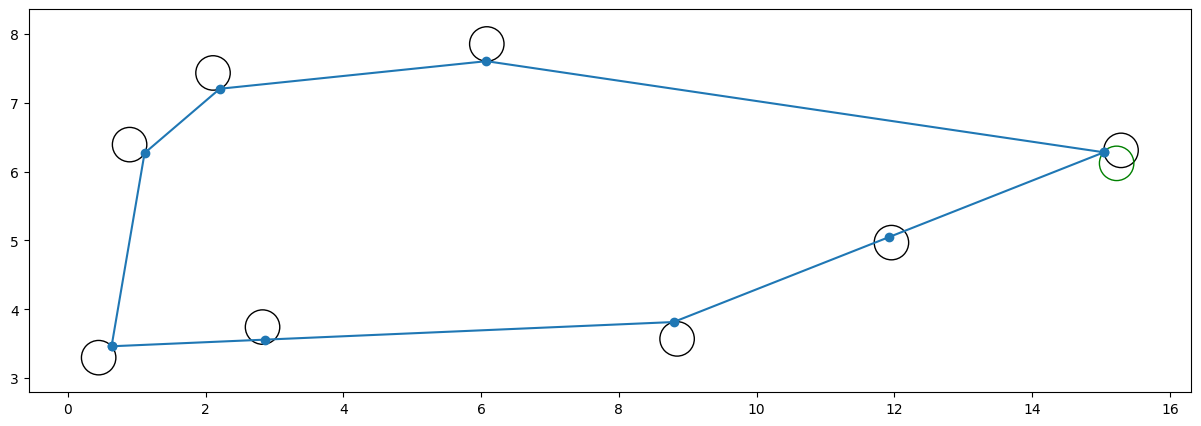

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plot_solution(plt.gca(), instance, initial_solution, highlight=[6])

In [8]:
timelimit = 220
node_values = []
def count(event):
    global node_values
    node_values.append(event.current_node.get_relaxed_solution().length())
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    depth = event.current_node.depth()

    if True or not event.current_node.get_relaxed_solution().is_simple():
        plt.figure(figsize=(5, 5))
        plt.title(f"{event.current_node.get_relaxed_solution().length()} vs. {ub}")
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.show()
        #event.current_node.prune()
        
opt_solution, lb = branch_and_bound(instance, count, initial_solution, timelimit)

Using node simplification.
Using ChFarthestCircle-Branching
Using DfsBfs search
Starting with root node of size 7
i	LB	|	UB	|	Time
0	inf	|	32.1258	|	0s
---------------
0	inf	|	32.1258
1 iterations with 0 nodes explored and 0 branches.


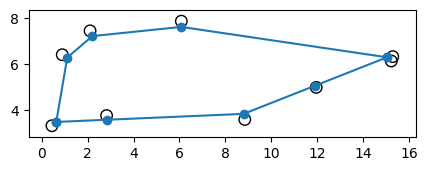

In [9]:
plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)